# Adoption Funnel

We built a Markov mixing process to exhibit the dynamics of an adoption process as a finite state machine. Simply put, we have a random process that can change between a group of 5 states, and when in any given state, the probability of change to another status only depends on which state the state machine is in currently. The future is independent of the past, given the present state. Below is a diagram of the different stages the states can take on: 

## State Machine
![State Machine](images/state_machine.png)

### State Transition Table

| Current State    |  Input | Next State     |  Threshold | Output Reputation  |Output Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|:-----:|
|Unaware |Marketing Signal     |Unaware    | Not Exceeded | Empty $\emptyset$      |None      |
|Unaware |Marketing Signal     |Aware    | Exceeded | Exists $\exists$     | None      |
|Aware    | Reputation    |Aware    | Not Exceeded | Exists $\exists$       |None      |
|Aware    | Reputation    |Adopted    | Exceeded | Positive (+)     |None      |
|Adopted    | Experience    |Adopted    | Not Exceeded | Positive (+)      |Some      |
|Adopted    | Experience    |Loyal    | Exceeded | Positive  (+)      |Increased      |
|Adopted    | Experience    |Churned    | Lower Limit Exceeded | Negative  (-)    | Decreased      |
|Loyal    | Experience    |Loyal    | Exceeded | Positive (++)     | Increased      |
|Loyal    | Experience    |Adopted    | Lower Limit Exceeded | Positive (+)      | Decreased      |
|Churned    | Reputation    |Churned    | Lower Limit Exceeded | Negative (-)      | None      |
|Churned    | Reputation    |Adopted    |  Exceeded | Positive (+)      | None     |



## cadCAD Specification
In cadCAD, we like to define how the system works diagrammatically before we begin coding. 
![cadCAD Specification](images/adoption_cadcad_spec.png)

Targeted members are treated as sub-population pools as they move through states of adoption, using a developed Adoption_pool class object, as seen in [utils.py](model/parts/utils.py).


### Differential Update Equations

Below are the mathematical specifications for the equations used in the simulation:
#### Drip Function

$$ \Delta{V} = \frac{\delta \cdot (V_C \times \mu_C -  V_C  \times \mu_{\tau})}{\mu} $$

#### Current State

$$ V_C = V_C - \Delta{V} $$

$$ \mu_C =\frac{ V_C \cdot \mu_C - \delta \cdot \mu_C  \cdot \Delta{V}}{V_C - \Delta{V}}$$

#### Next State

$$ V_N = V_N + \Delta{V} $$

$$ \mu_N = \frac{V_N \cdot \mu_N + \delta \cdot \mu_C \cdot \Delta{V}}{V_N + \Delta{V}}$$

Where:

1. $ \Delta{V}$ is the volume or count of pool members transitioning to the next state of adoption
1. $V_C$ is the volume or count of pool members for each current state of adoption, C
2. $\delta$ is the leak coefficient, available as a parameter choice
3. $\mu_C$ is the mean reputation for each current state of adoption, C
3. $\mu_{\tau}$ is the mean threshold reputation for each state of adoption
1. $V_N$ is the volume or count of pool members in the next state of adoption, N



## Model File structure
* adoption_funnel_model.ipynb
* model

In the model folder there exist 4 files and a parts folder, the [config.py](model/config.py), [partial_state_update_block.py](model/partial_state_update_block.py), [run.py](model/run.py), and [state_variables.py](state_variables.py). The [config.py](model/config.py) contains the simulation configurations, aggregating the partial states, and the state variables. The [partial_state_update_block.py](model/partial_state_update_block.py) contains the partial state update blocks and how they update the state variables. [state_variables.py](state_variables.py) defines the state variables and [run.py](model/run.py) actually runs the simulation. 

The components of the model live within the parts subfolder as:

* [adoption.py](model/parts/adoption.py)
* [marketing.py](model/parts/marketing.py)
* [utils.py](model/parts/utils.py)

The initial parameters and hyperparameters of the system are defined in [sys_params.py](model/sys_params.py) and helper functions, plots, etc. are in the [utils.py](model/parts/utils.py).


## Run Simulation
Our simulation has 1,000 timesteps with no monte carlo runs.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import configuration
from model import run

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.3
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 1000, 7, 4, 3)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (1000, 7, 4, 3)


Initializing configurations:   0%|          | 0/4 [00:00<?, ?it/s]

Execution Method: parallelize_simulations


Flattening results:   0%|          | 0/4 [00:00<?, ?it/s]

Total execution time: 0.79s


## Input Driving Signal
 This signal consists of a steady, constant component MARKETING_STEADY and a noisy influx of marketing spend, where magnitude and frequency can be governed through, MARKETING_SHOCK_MAG and MARKETING_SHOCK_FREQ, respectively.

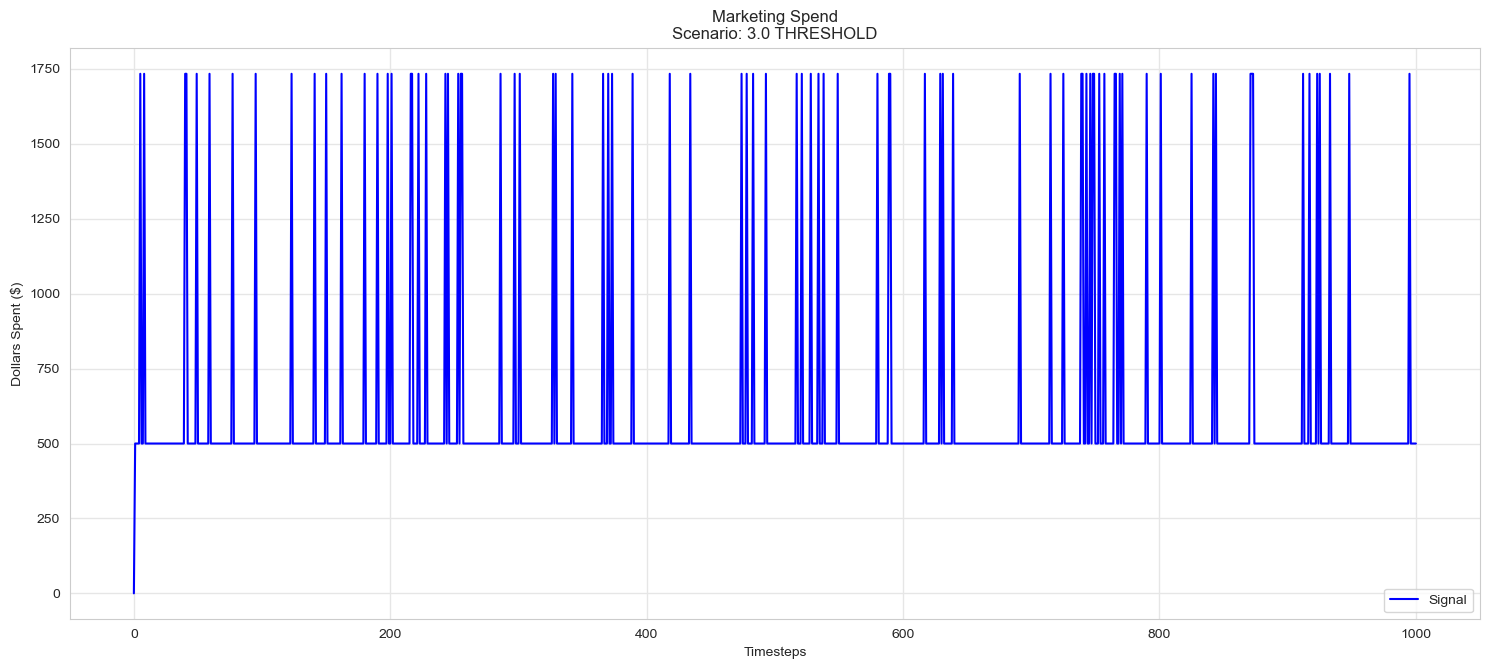

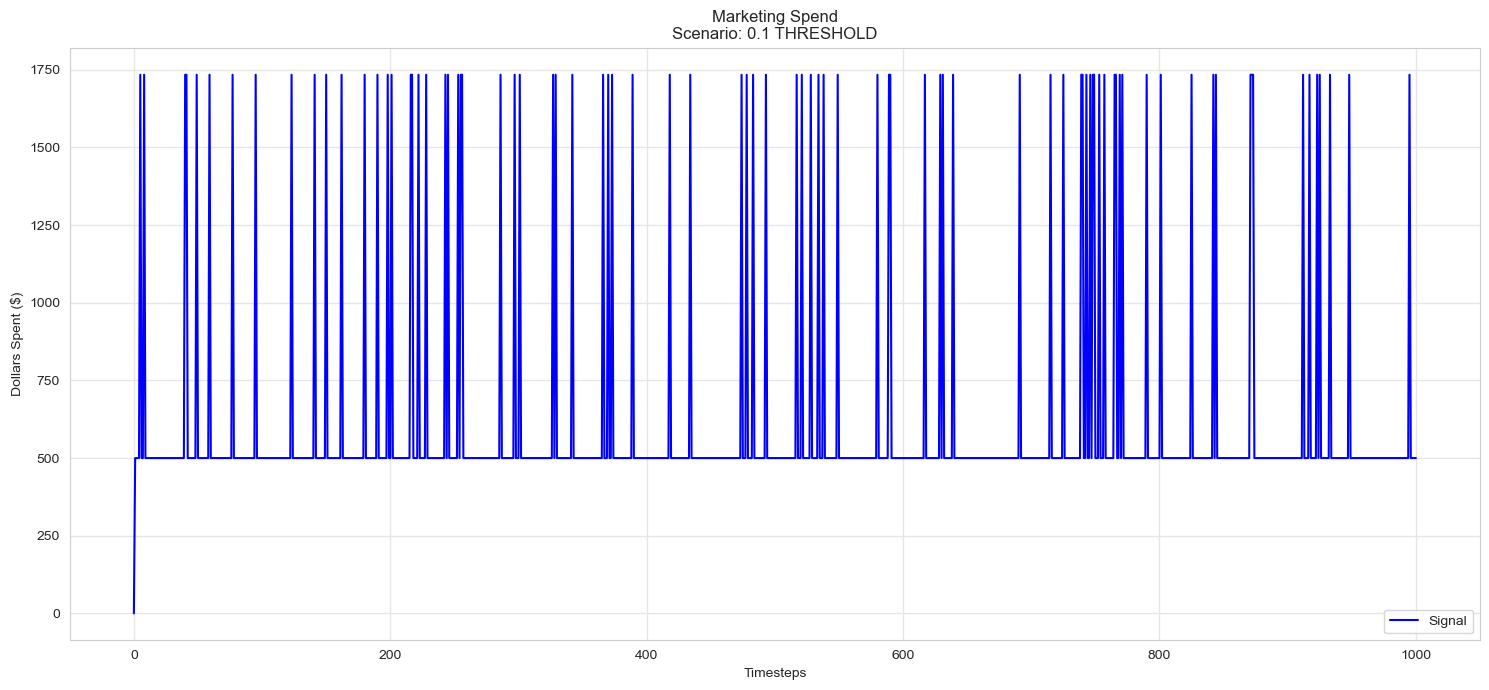

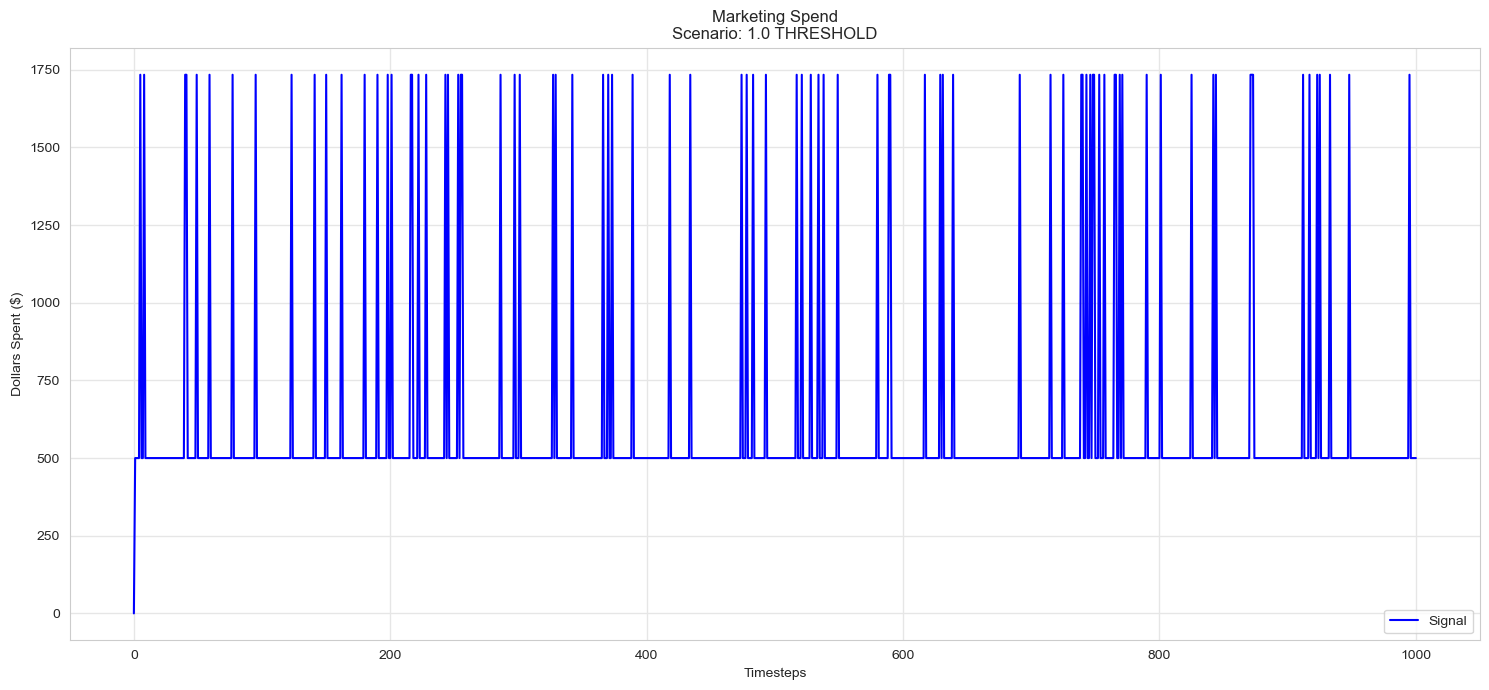

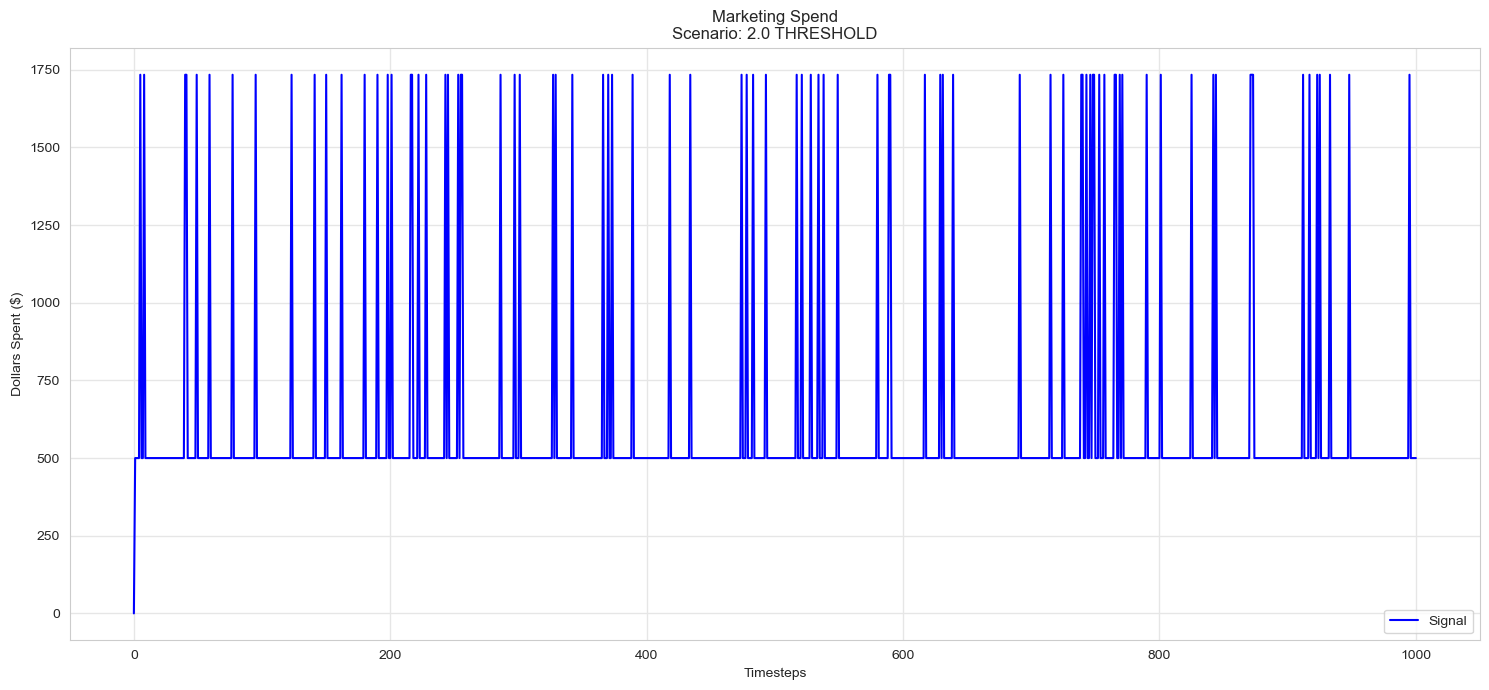

In [2]:
experiments = experiments.sort_values(by =['THRESHOLD']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['THRESHOLD']
    cc_label = experiments.iloc[cc_idx]['THRESHOLD']
    sub_experiments = experiments[experiments['THRESHOLD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        plot_label = experiment['THRESHOLD']
        ax = axs
        title = 'Marketing Spend' + '\n' + 'Scenario: ' + str(cc_label)  + ' THRESHOLD'
        ax.set_title(title)
        ax.set_ylabel('Dollars Spent ($)')
        colors = ['b','orange', 'g', 'magenta', 'r']

        ax.plot(df.timestep, df['signal'],color = colors[0], label='Signal')



        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

## Pool Volume through Adoption
The positive driving signal, coupled with positive repuation signal, drives the pool toward loyal adoption.

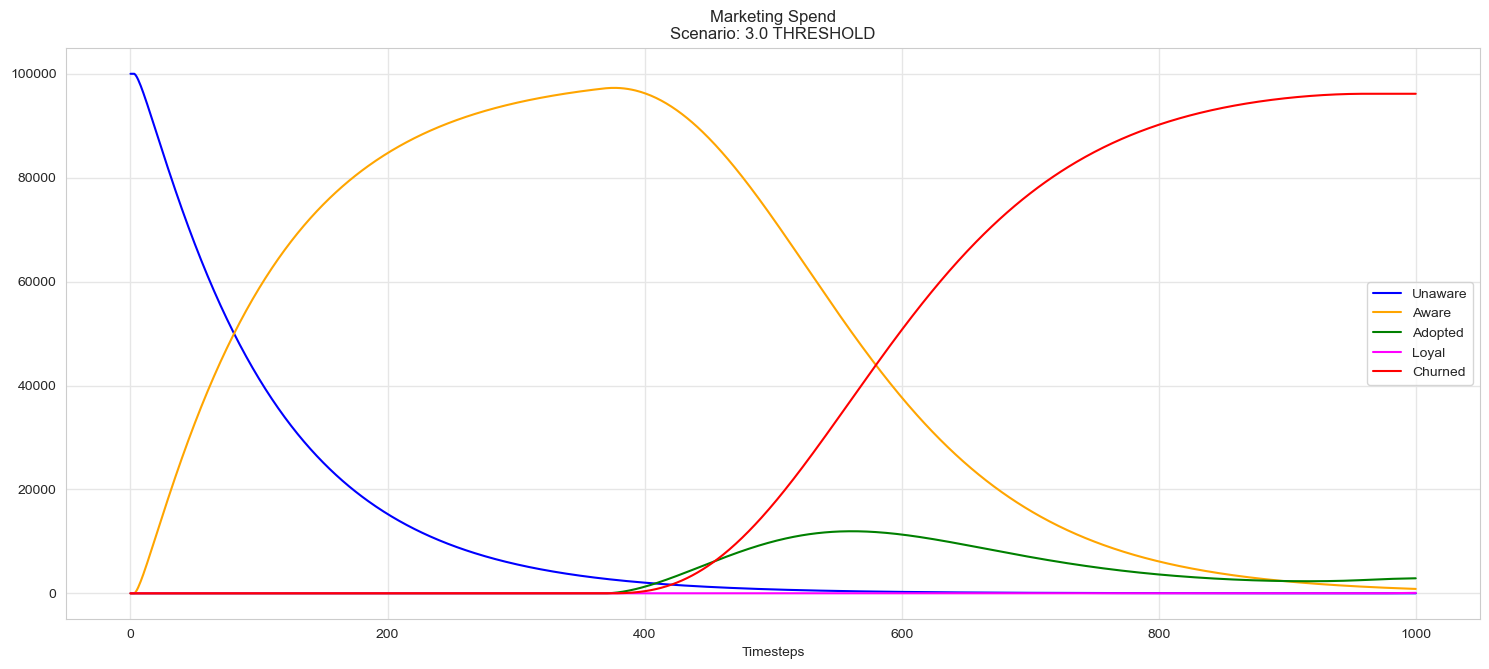

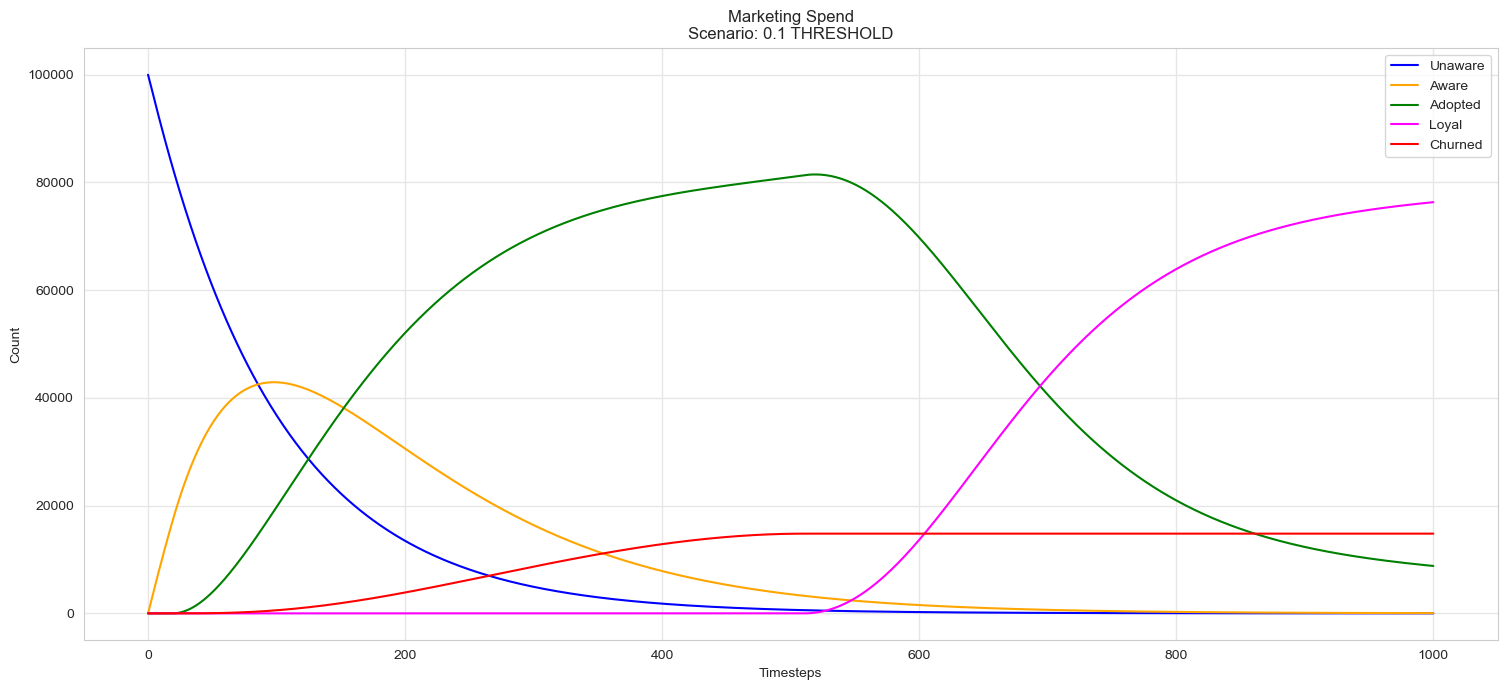

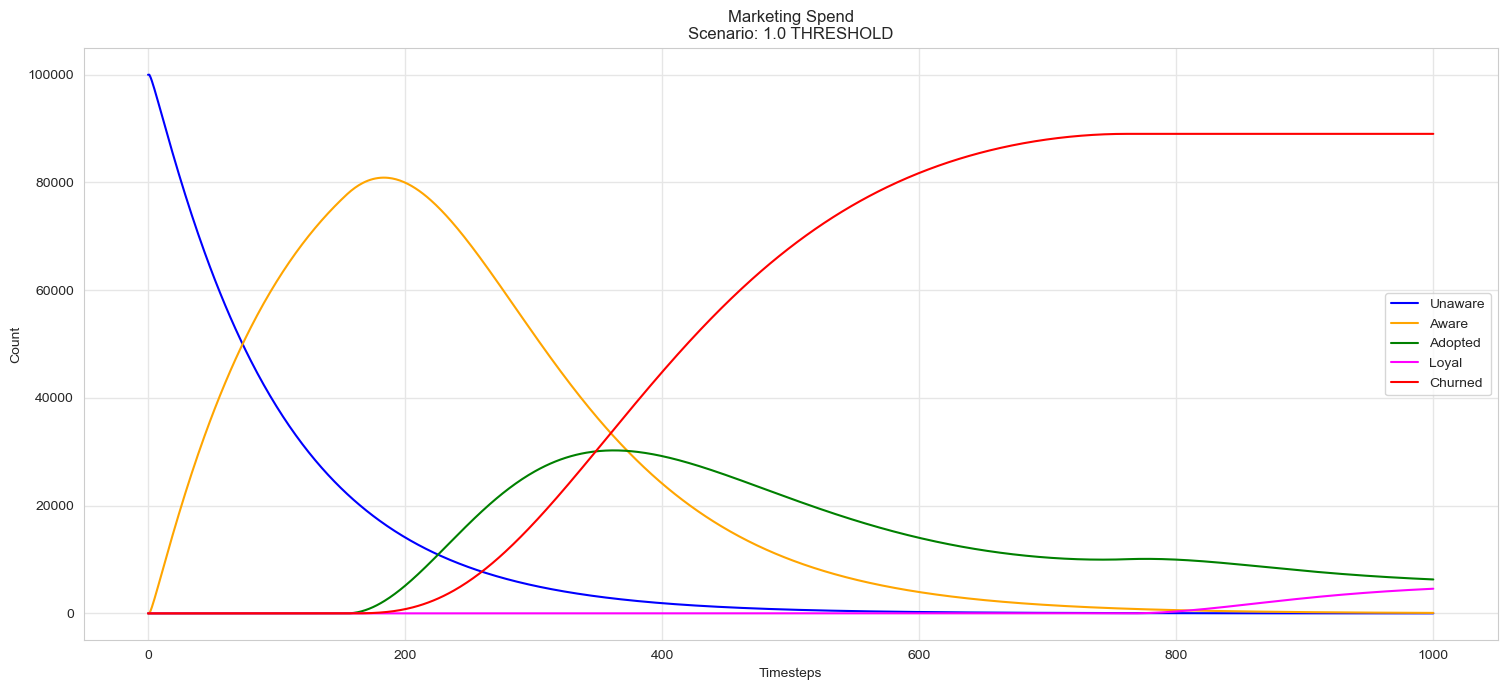

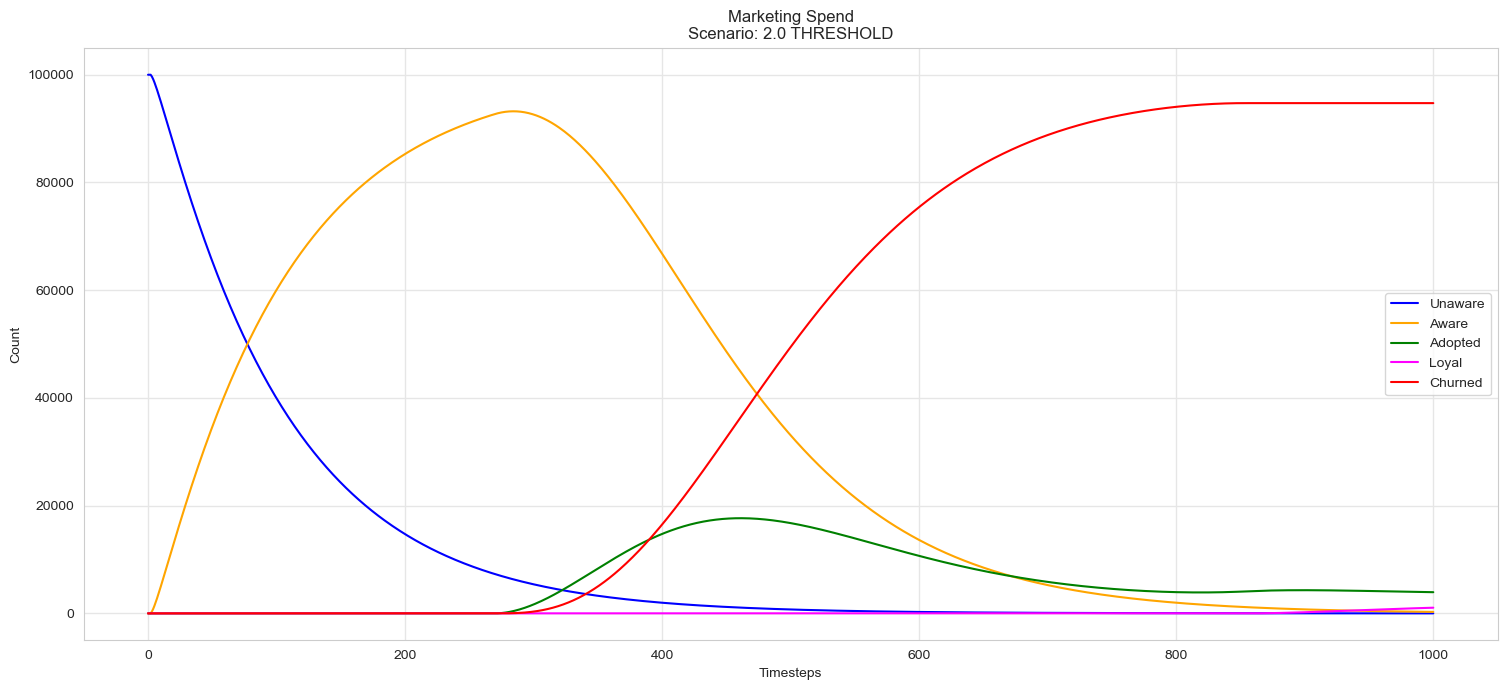

In [3]:
experiments = experiments.sort_values(by =['THRESHOLD']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['THRESHOLD']
    cc_label = experiments.iloc[cc_idx]['THRESHOLD']
    sub_experiments = experiments[experiments['THRESHOLD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        
        df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['pool']))
        df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['pool']))
        df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['pool']))
        df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['pool']))
        df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['pool']))

        ax.set_ylabel('Count')
        colors = ['b','orange', 'g', 'magenta', 'r']

        plot_label = experiment['THRESHOLD']
        ax = axs
        title = 'Marketing Spend' + '\n' + 'Scenario: ' + str(cc_label)  + ' THRESHOLD'
        ax.set_title(title)

        colors = ['b','orange', 'g', 'magenta', 'r']

        ax.plot(df.timestep, df['unaware'],color = colors[0], label='Unaware')
        ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
        ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
        ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
        ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')
                
        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

## Repuation Signal at each state of adoption
The mean repuation internal signal of the pool at each adoption state.

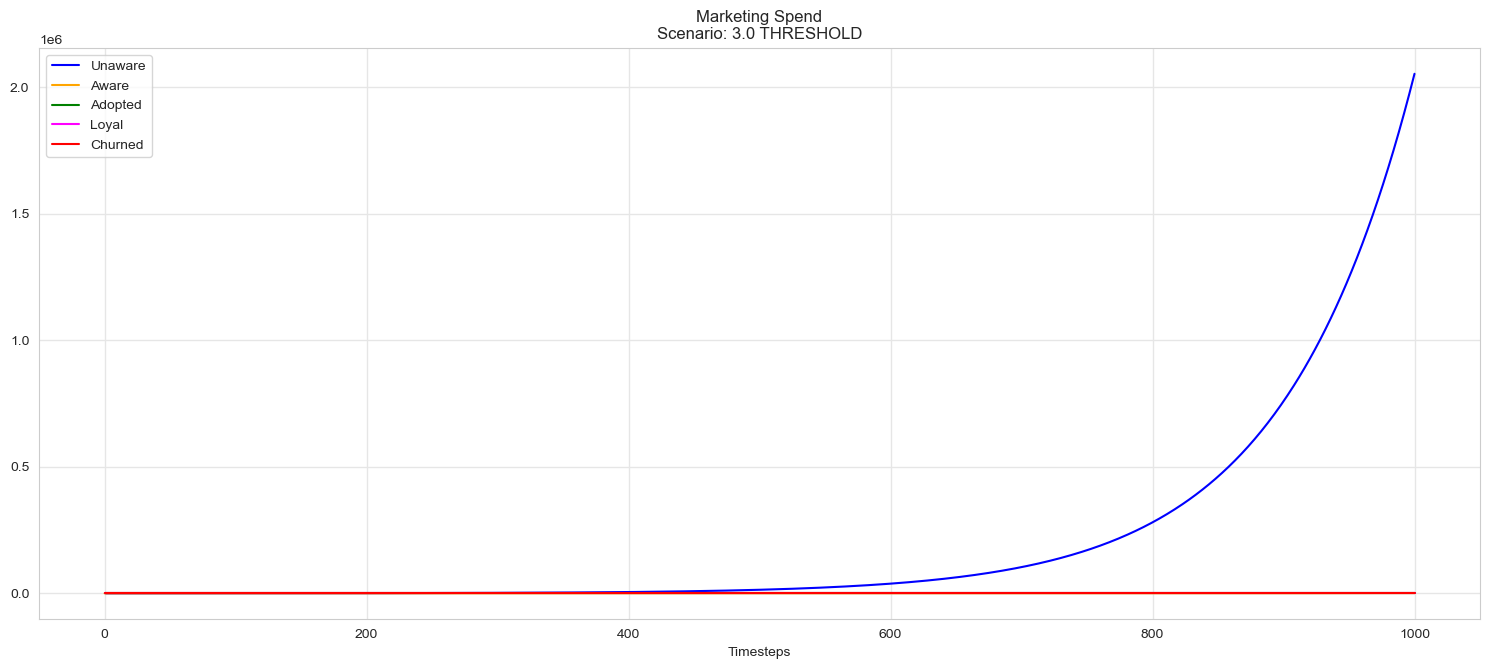

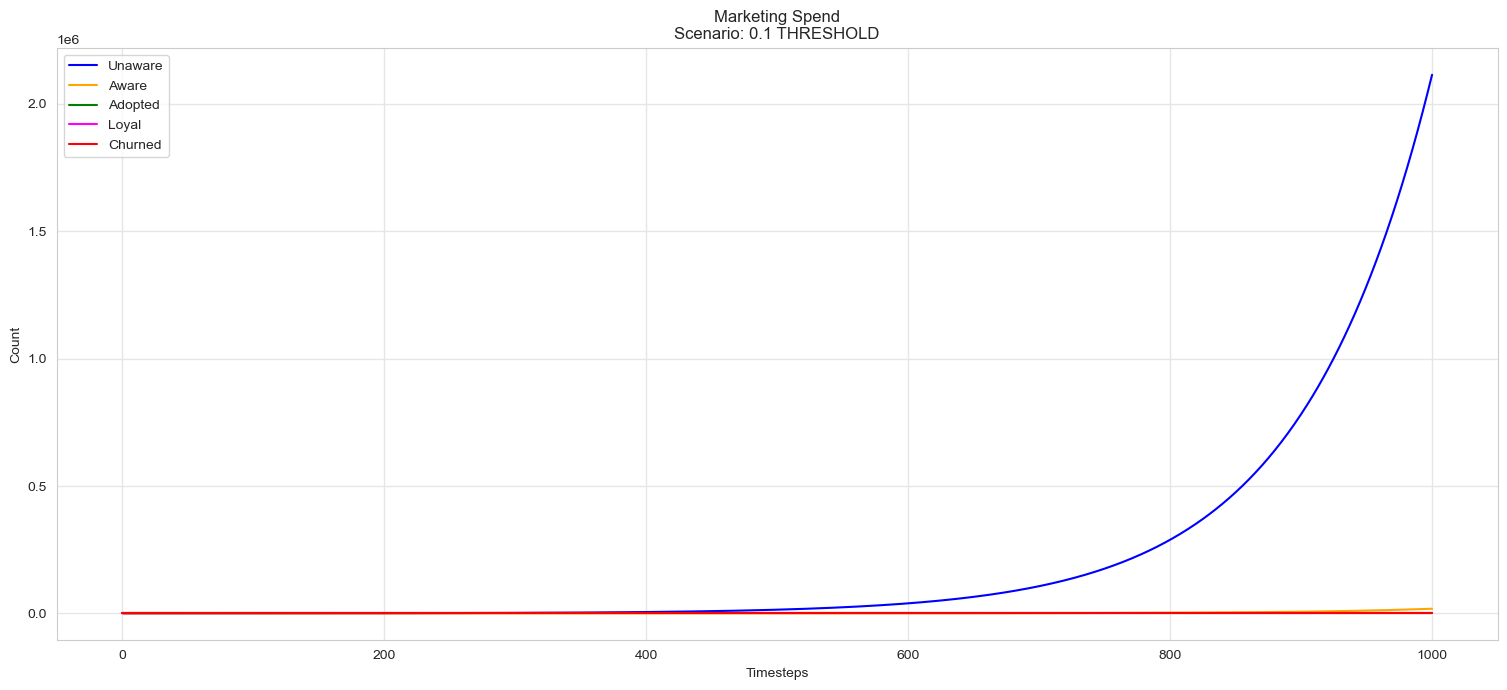

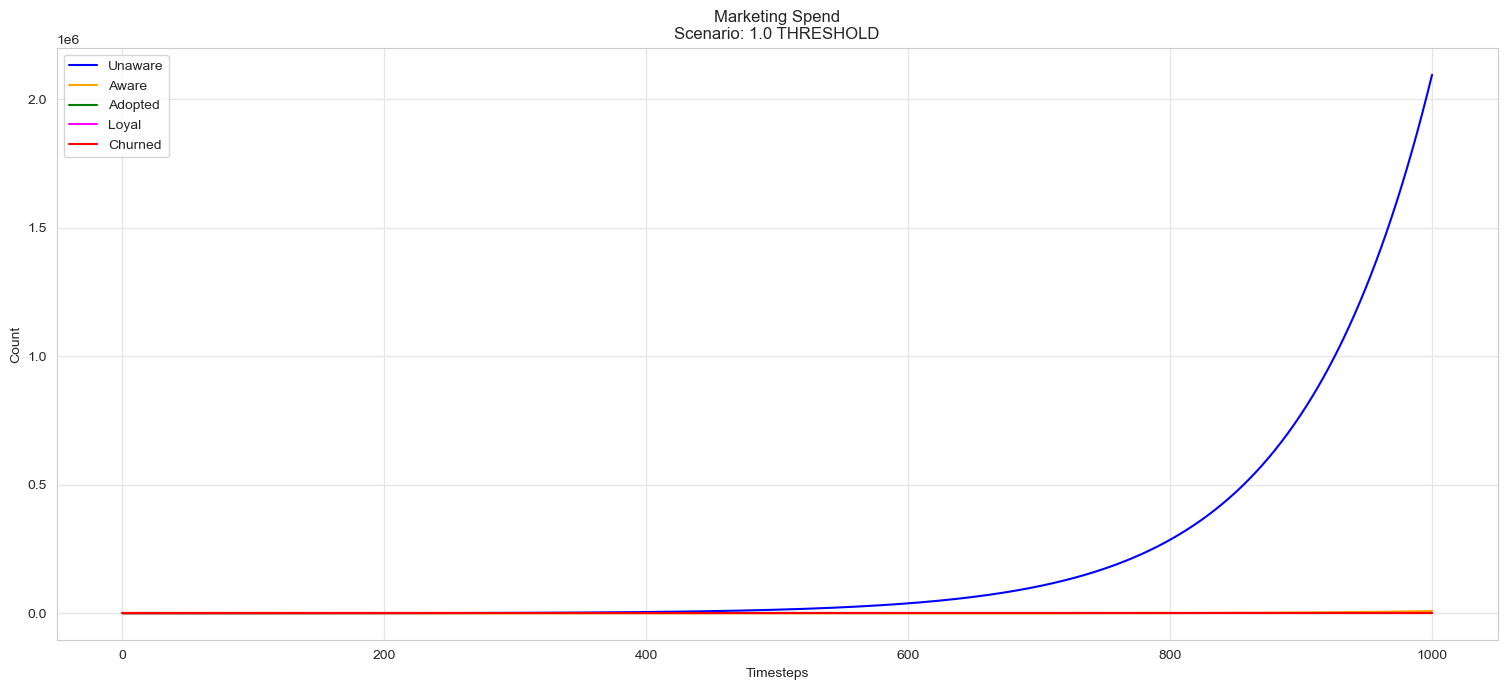

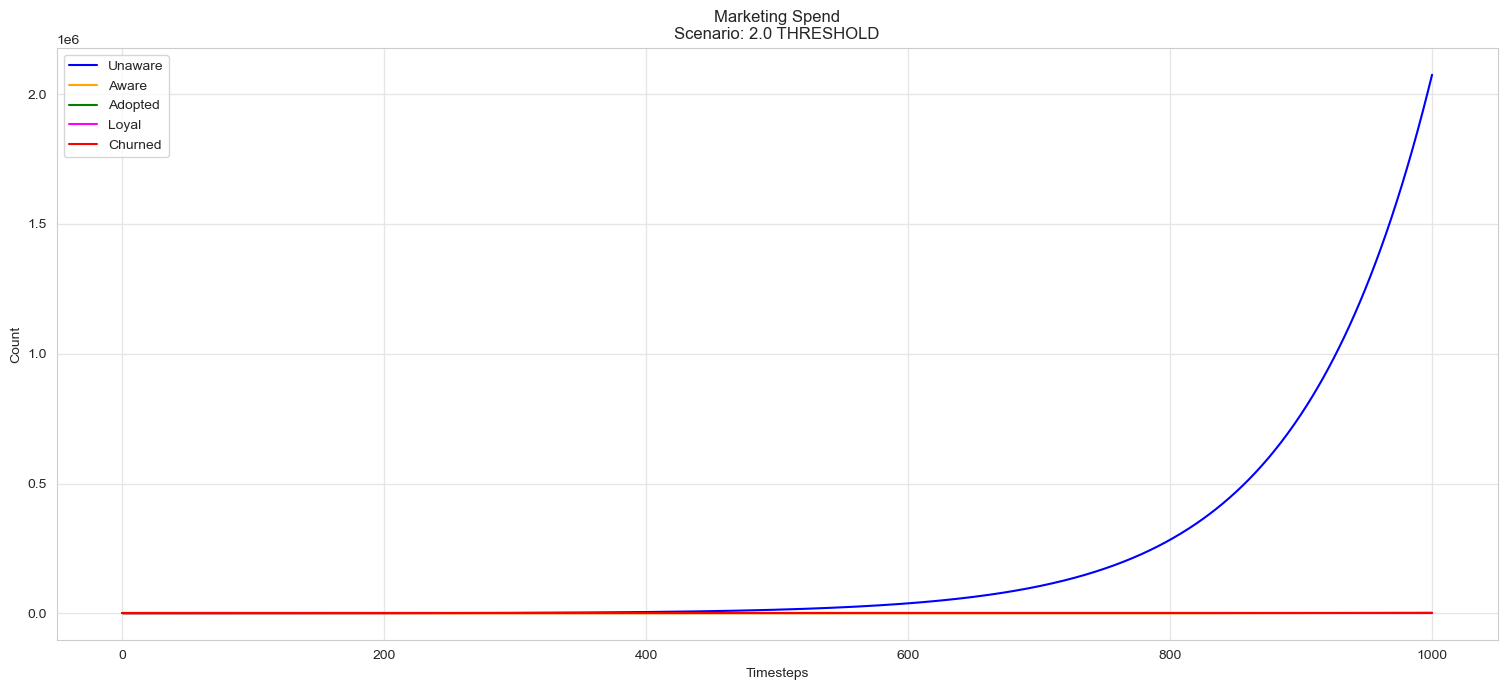

In [4]:
experiments = experiments.sort_values(by =['THRESHOLD']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['THRESHOLD']
    cc_label = experiments.iloc[cc_idx]['THRESHOLD']
    sub_experiments = experiments[experiments['THRESHOLD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        
        df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['reputation']))
        df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['reputation']))
        df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['reputation']))
        df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['reputation']))
        df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['reputation']))

        ax.set_ylabel('Count')
        colors = ['b','orange', 'g', 'magenta', 'r']

        plot_label = experiment['THRESHOLD']
        ax = axs
        title = 'Marketing Spend' + '\n' + 'Scenario: ' + str(cc_label)  + ' THRESHOLD'
        ax.set_title(title)

        colors = ['b','orange', 'g', 'magenta', 'r']

        ax.plot(df.timestep, df['unaware'],color = colors[0], label='Unaware')
        ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
        ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
        ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
        ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')
                
        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

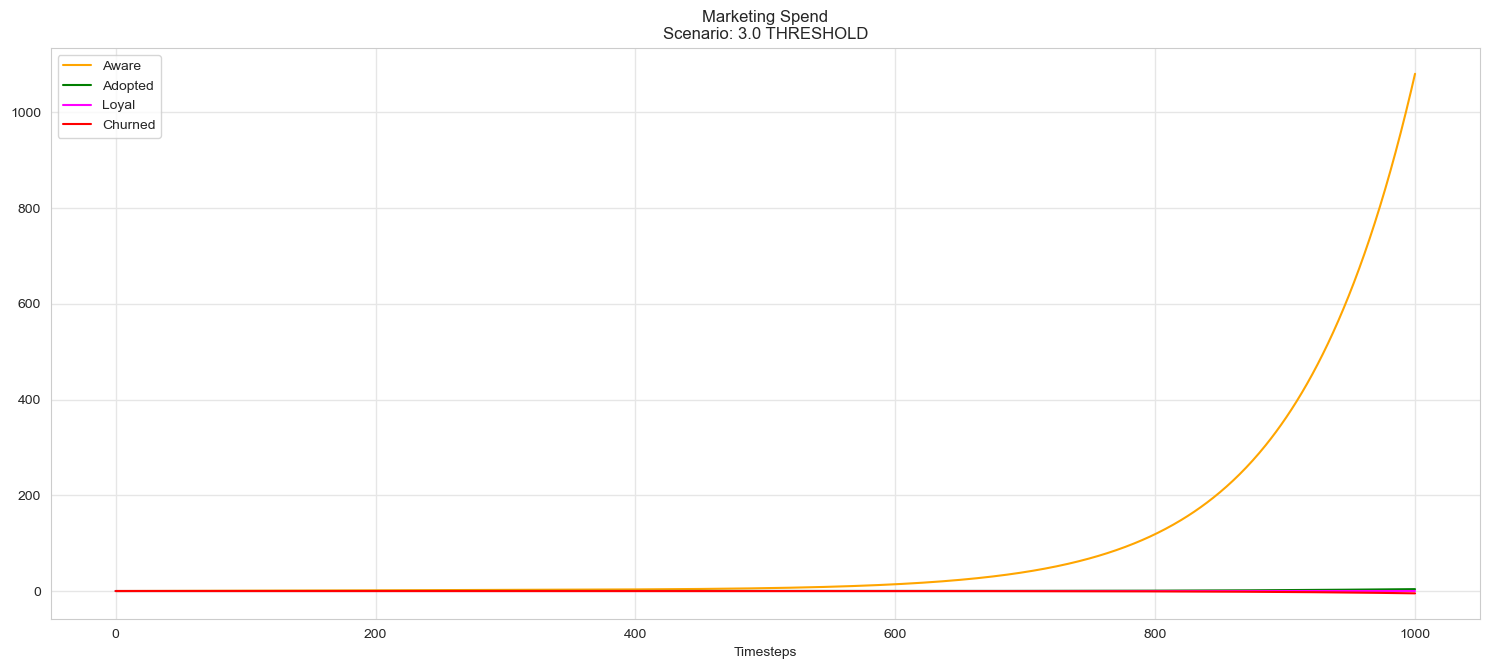

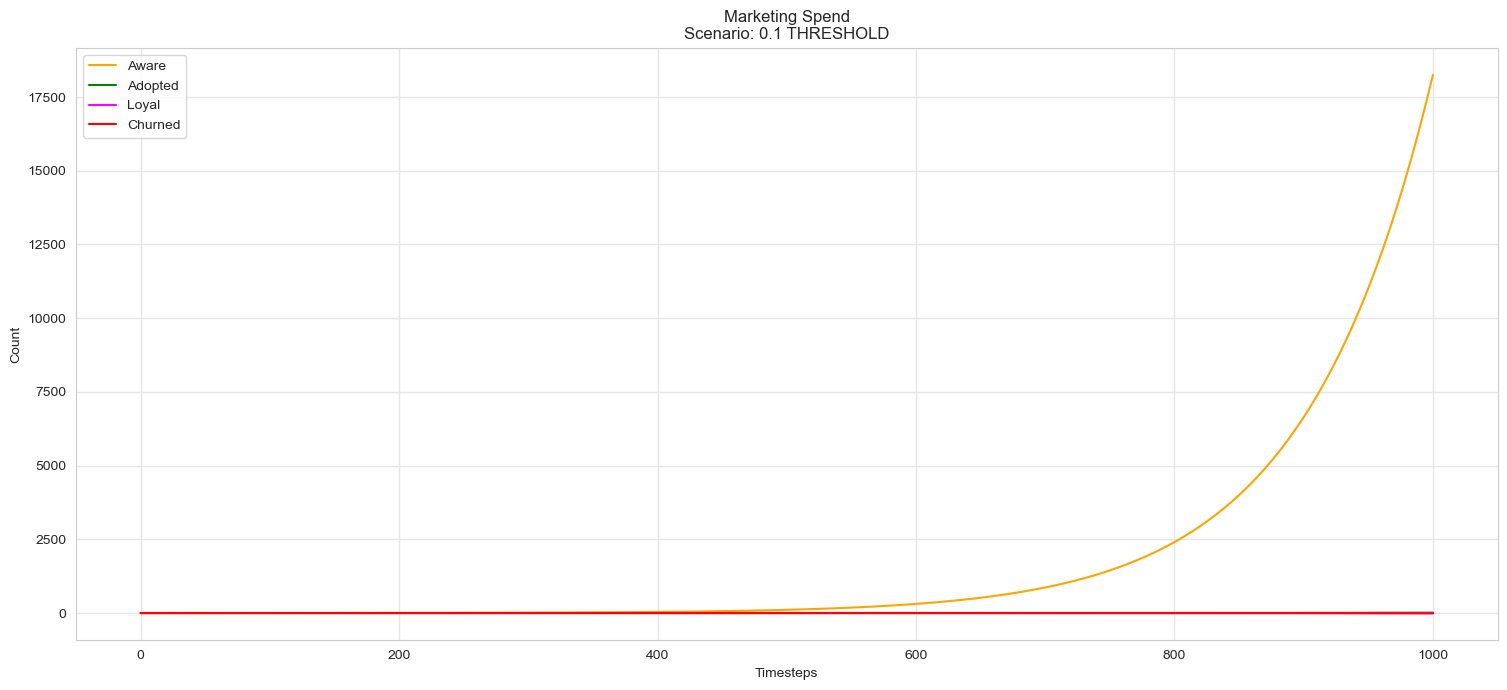

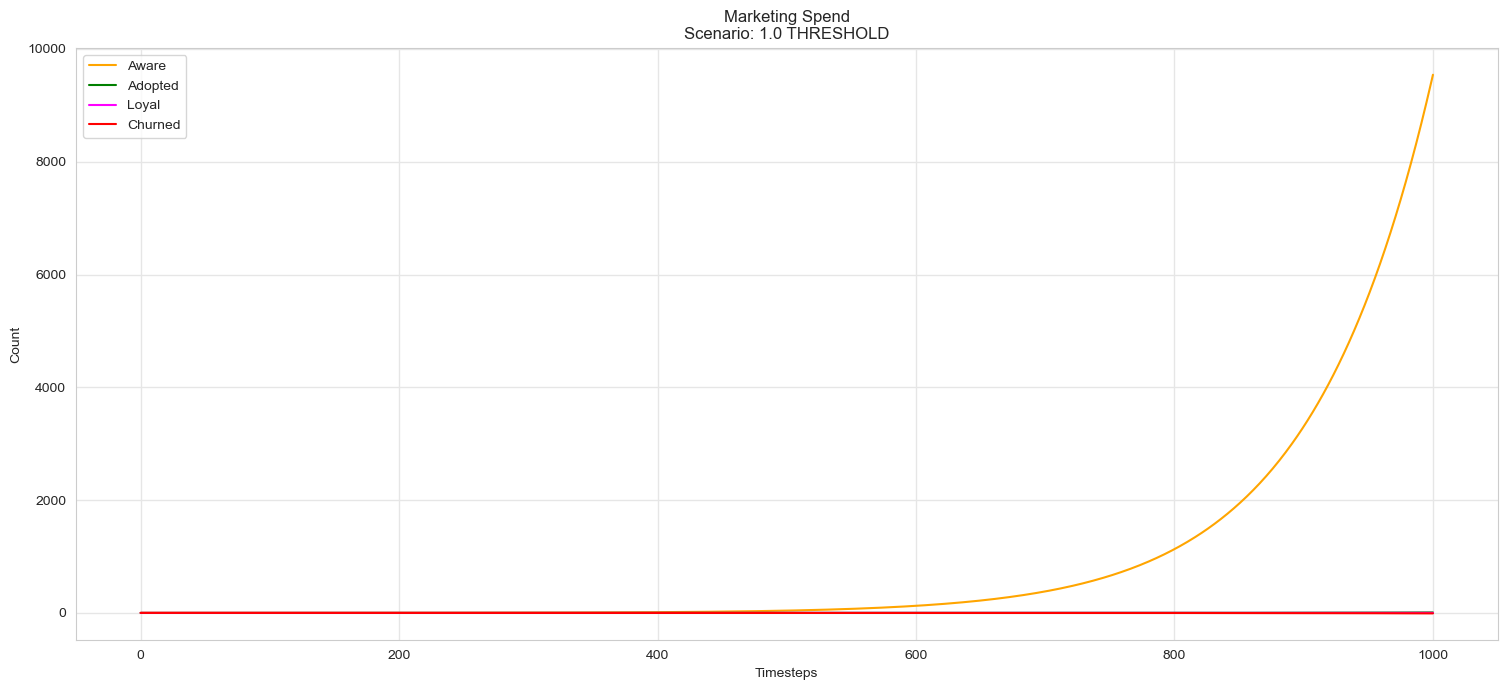

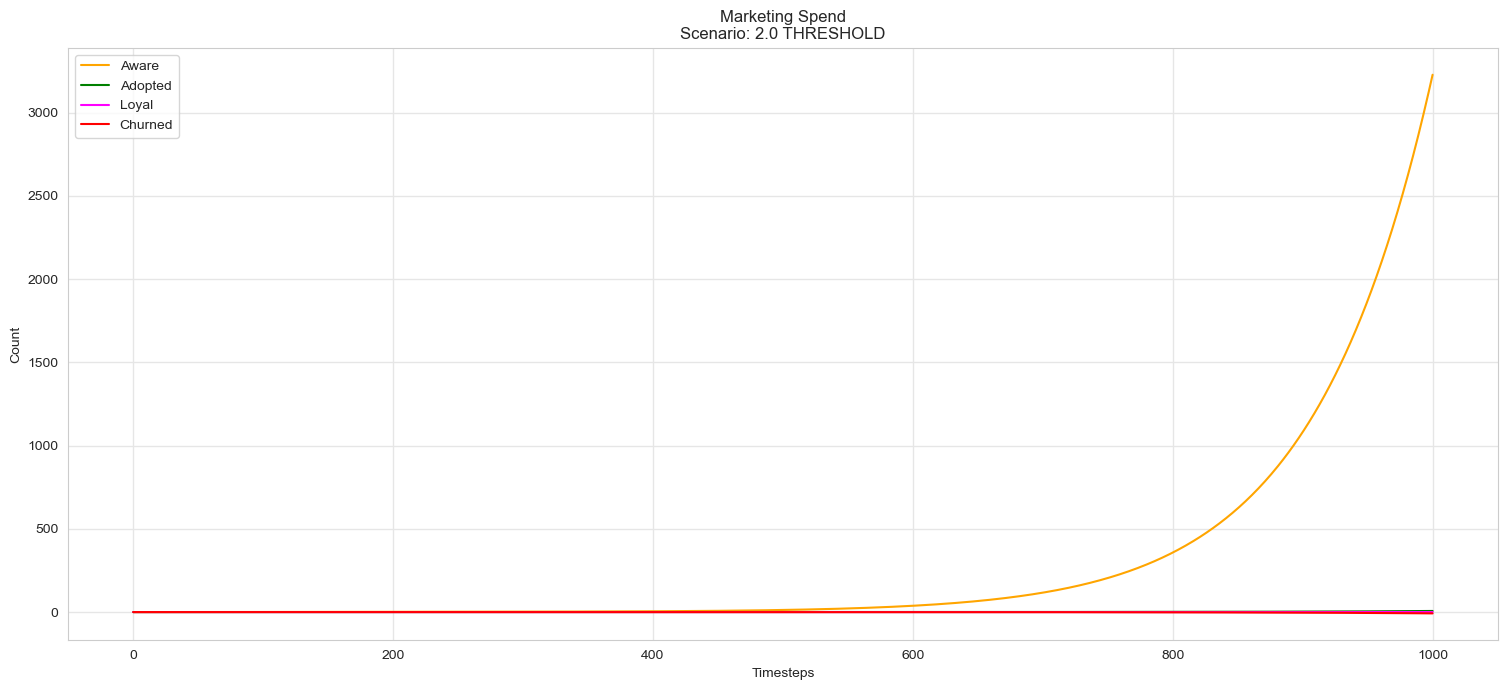

In [5]:
experiments = experiments.sort_values(by =['THRESHOLD']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['THRESHOLD']
    cc_label = experiments.iloc[cc_idx]['THRESHOLD']
    sub_experiments = experiments[experiments['THRESHOLD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        
        df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['reputation']))
        df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['reputation']))
        df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['reputation']))
        df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['reputation']))

        ax.set_ylabel('Count')
        colors = ['b','orange', 'g', 'magenta', 'r']

        plot_label = experiment['THRESHOLD']
        ax = axs
        title = 'Marketing Spend' + '\n' + 'Scenario: ' + str(cc_label)  + ' THRESHOLD'
        ax.set_title(title)

        colors = ['b','orange', 'g', 'magenta', 'r']

        ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
        ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
        ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
        ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')
                
        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

### More to Explore
1. There is no filter from the input driving signal to the unaware internal reputation signal. Or I should say a naive filter where a postive marketing signal results in a unitary uptick in reputation for the unaware pool.
2. The threshold was set globally for this simulation. However, the threshold is available to be set for each state of adoption as well as be updated dynamically throughout the simulation, using the set_threshold method in the Adoption_Pool class. 
2. A separate 'experience' signal can be integrated to the reputation signal to influence and determine the adoption as members move through the adopted, loyal, and churned states.
3. Negative experience signals have not yet tested, but I expect there will be signals where the population could driven towards churned state and others where steady-state flow can be achieved.
4. Experience signals can be incorporated (or estimated) through KPIs if this were part of a larger model.
5. Development for this model to become the driving signal module to be integrated into other model configurations

#### Product Metric

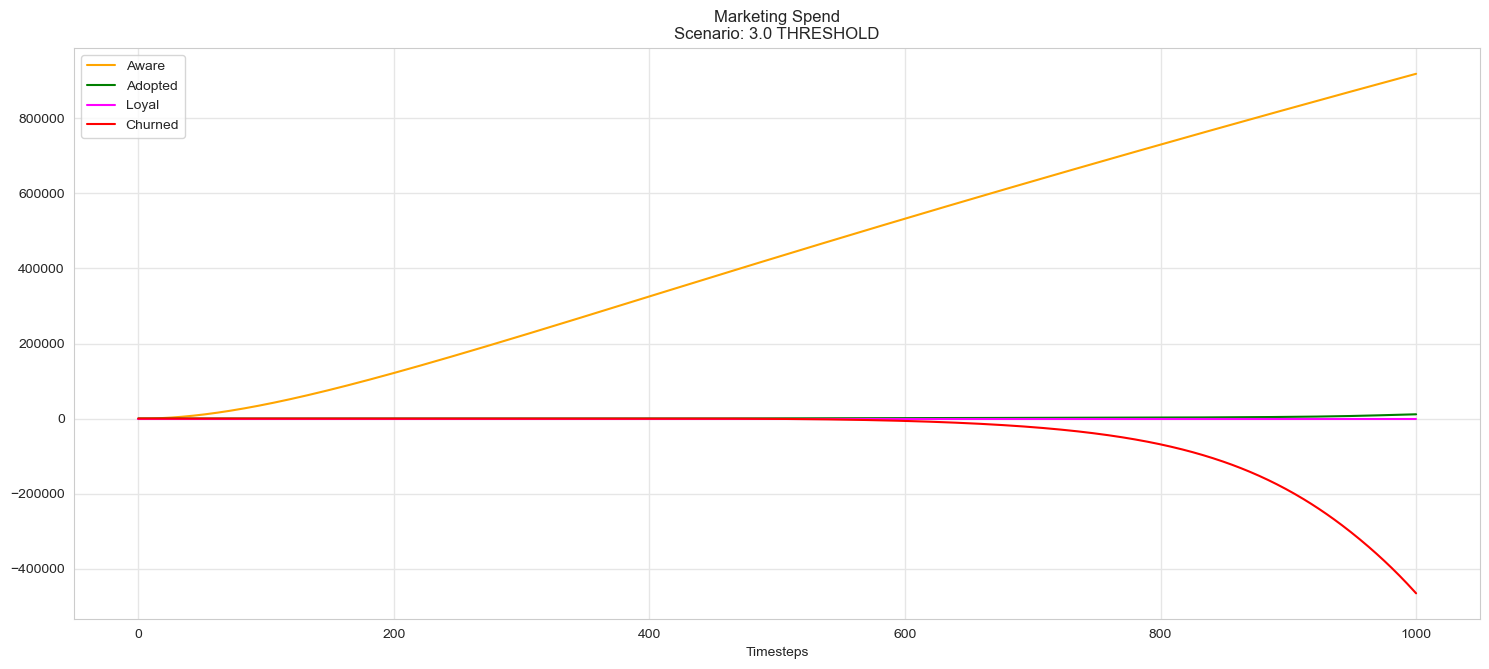

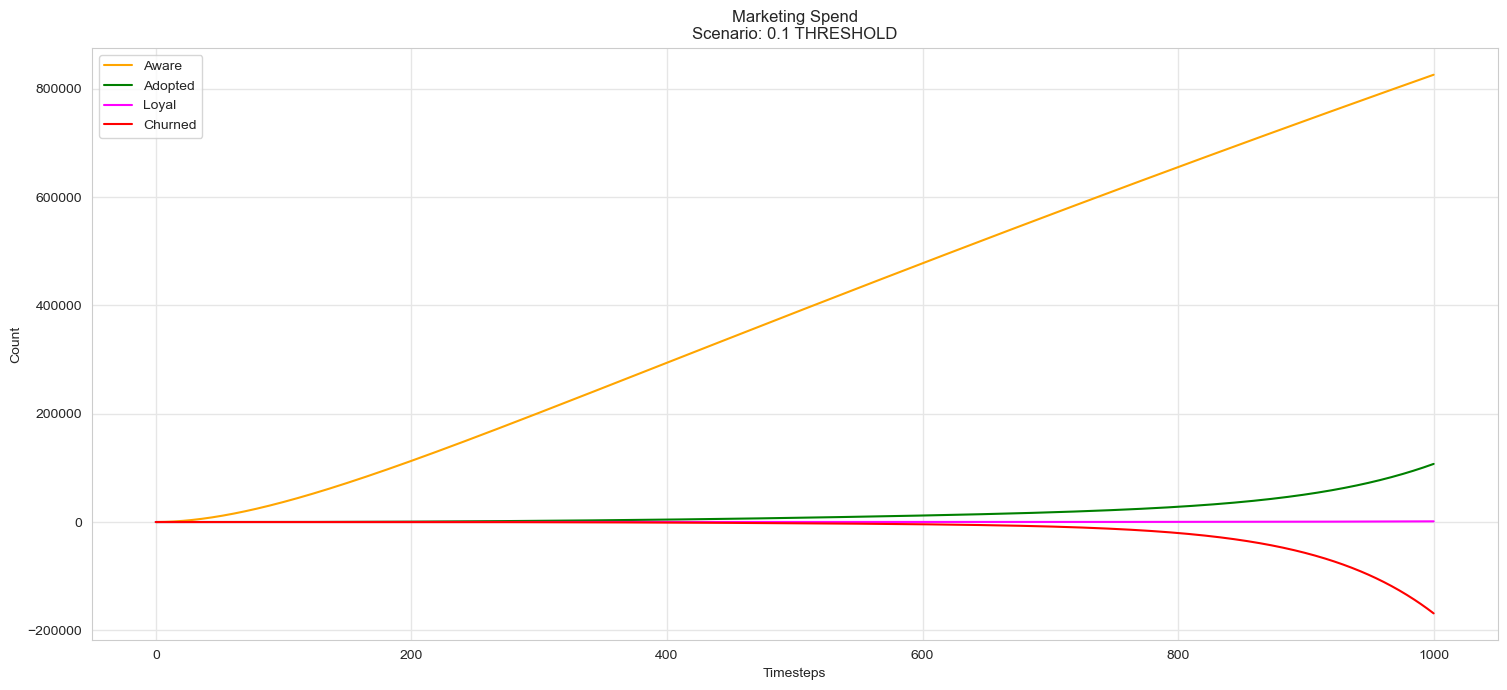

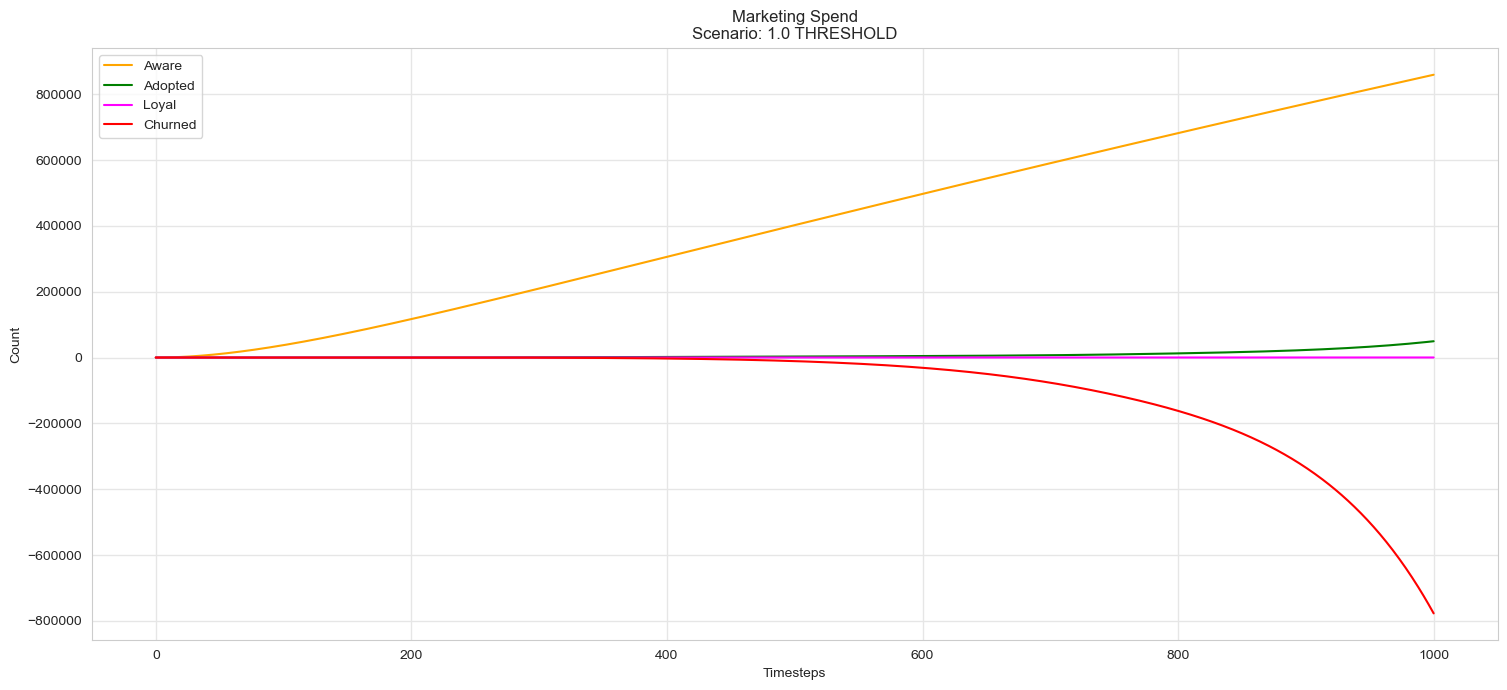

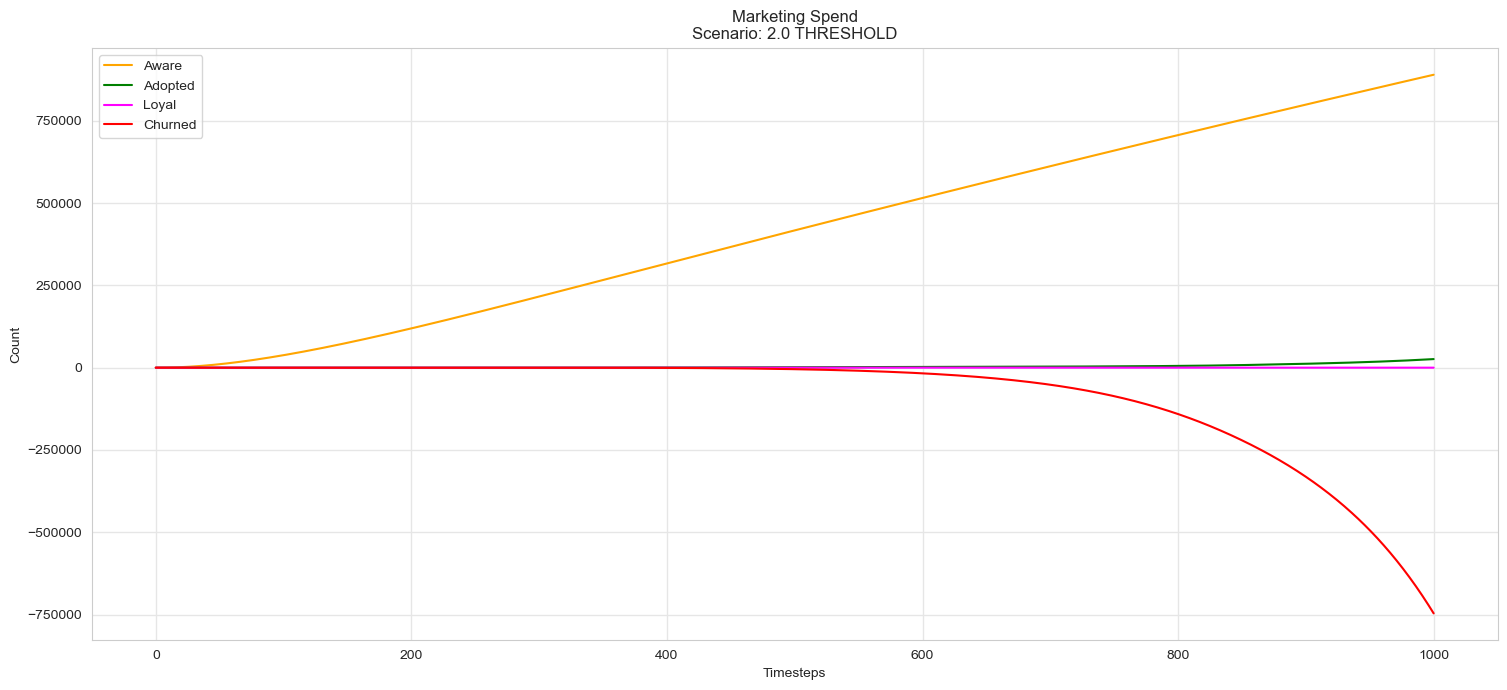

In [6]:
experiments = experiments.sort_values(by =['THRESHOLD']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['THRESHOLD']
    cc_label = experiments.iloc[cc_idx]['THRESHOLD']
    sub_experiments = experiments[experiments['THRESHOLD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['reputation']* x.state['aware']['pool']))
        df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['reputation']* x.state['adopted']['pool']))
        df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['reputation']* x.state['loyal']['pool']))
        df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['reputation']* x.state['churned']['pool']))

        ax.set_ylabel('Count')
        colors = ['b','orange', 'g', 'magenta', 'r']

        plot_label = experiment['THRESHOLD']
        ax = axs
        title = 'Marketing Spend' + '\n' + 'Scenario: ' + str(cc_label)  + ' THRESHOLD'
        ax.set_title(title)

        colors = ['b','orange', 'g', 'magenta', 'r']

        ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
        ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
        ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
        ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')
                
        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()


## Conclusion

In this demo, we have demonstrated how cadCAD can be used with class objects, illustrated a finite state machine, and shown how traditional business processes and concepts can be rigorously modeled with cadCAD.